In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.float_format', '{:.5f}'.format)

# Modeling

In [3]:
# read in the data
rea = pd.read_csv("Data/real_estate_2020_2024.csv")

In [4]:
rea.columns

Index(['parcel_number', 'year', 'exterior_condition', 'interior_condition',
       'homestead_exemption', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_stories', 'year_built', 'sale_year', 'condo', 'apartments',
       'commercial', 'garage', 'hotel', 'industrial', 'mixed_use',
       'multi_family', 'offices', 'retail', 'single_family', 'special_purpose',
       'vacant_land', 'mailing_outside_city', 'chg_taxable_1yr',
       'chg_taxable_1yr_%', 'chg_taxable_3yr', 'chg_taxable_3yr_%',
       'chg_taxable_5yr', 'chg_taxable_5yr_%', 'taxable_%', 'delinq',
       'delinq_1yr', 'delinq_2yr', 'delinq_3yr', 'delinq_4yr', 'delinq_5yr',
       'years_delinq', 'years_since_last_delinq', 'max_conseq_years_delinq',
       'sale_price_log', 'total_area_log', 'total_livable_area_log',
       'market_value_log', 'taxable_land_log', 'taxable_building_log',
       'exempt_land_log', 'exempt_building_log', 'taxable_log', 'exempt_log',
       'taxable_1yr_log', 'exempt_1yr_log', 'taxable

In [5]:
rea.shape

(2855503, 63)

## Partition the Data

In [6]:
# assign X and y variables
X = rea.copy(deep=True)
X.drop(columns=["parcel_number","delinq_bal_log","delinq"], inplace=True)
y = rea.delinq

In [7]:
# create the training sets
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
# create the test and validate sets
X_test, X_val, y_test, y_val = train_test_split(X_split, y_split, test_size=0.5, random_state=42)

In [ ]:
X_train.shape

(1713301, 60)

In [ ]:
y_train.shape

(1713301,)

In [ ]:
X_val.shape

(571101, 60)

In [ ]:
y_val.shape

(571101,)

In [ ]:
X_test.shape

(571101, 60)

In [ ]:
y_test.shape

(571101,)

## Decision Tree

In [ ]:
# set param grid for Decision Tree Hyperparameter tuning
param_grid_tree = {
        'max_depth': [10, 15, 20, 25, 30],
        'min_samples_split': [50, 100, 500, 1000], 
        'min_samples_leaf': [25, 50, 100, 500], 
        'max_features': ['sqrt', 'log2', None] 
}

# run grid search cross validation
best_model_tree = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), 
                               param_grid=param_grid_tree, 
                               scoring='accuracy',
                               cv=3)

# fit model to data
best_model_tree = best_model_tree.fit(X_train, y_train)

# display params of best model for Decision tree
best_model_tree.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 25,
 'min_samples_split': 1000}

In [ ]:
# create decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth = 30, 
                                  min_samples_split = 1000,
                                  min_samples_leaf = 25,
                                  max_features = 'log2'
                                  )

# fit model to training set
clf = clf.fit(X_train, y_train)

# make predictions on the training set
y_train_predict_clf = clf.predict(X_train)

# make predictions on the validation set
y_val_predict_clf = clf.predict(X_val)

# calculate accuracy of train data
accuracy_score(y_train, y_train_predict_clf)

0.9832154420034775

In [ ]:
# calculate accuracy of validation data
accuracy_score(y_val, y_val_predict_clf)

0.983398733323878

In [ ]:
print(classification_report(y_val, y_val_predict_clf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    499271
           1       1.00      0.87      0.93     71830

    accuracy                           0.98    571101
   macro avg       0.99      0.93      0.96    571101
weighted avg       0.98      0.98      0.98    571101



In [ ]:
# create arrays with importance and column names
importances = clf.feature_importances_
feature_names = X_train.columns

# create feature importances df
feat_imp = pd.DataFrame(importances, index=feature_names, columns=['feature_importances'])

# dispaly importances
feat_imp.sort_values(by='feature_importances', ascending=False)


,feature_importances
delinq_bal_4yr_log,0.69064
max_conseq_years_delinq,0.20358
delinq_3yr,0.06407
delinq_bal_5yr_log,0.02913
delinq_bal_2yr_log,0.00490
taxable_%,0.00266
chg_taxable_1yr,0.00056
taxable_building_log,0.00034
sale_price_log,0.00034
taxable_log,0.00032


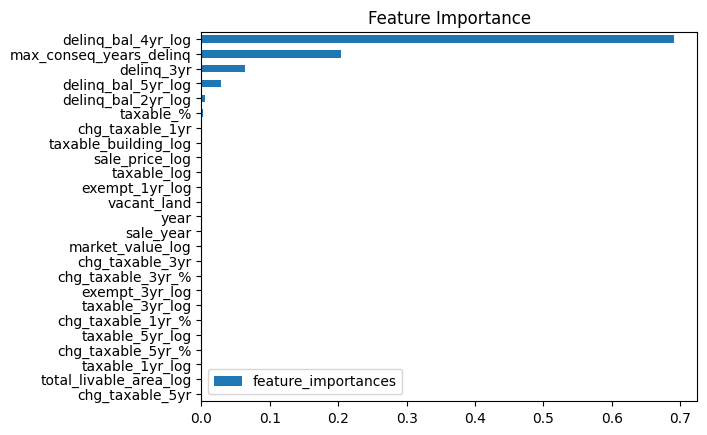

In [ ]:
# plot the feature importances
feat_imp[feat_imp.feature_importances > 0.0001].sort_values(by='feature_importances').plot(kind='barh')
plt.title("Feature Importance")
plt.show()

## Random Forest

In [9]:
# set param grid for Random Forest Hyperparameter tuning
param_grid_rf = {
        'n_estimators': [100, 300, 500],
        ##'max_depth': [20, 25, 30]
        ##,'max_features': ['sqrt', 'log2', None]
}

# run grid search cross validation
best_model_rf = GridSearchCV(RandomForestClassifier(max_depth = 30, 
                                                        min_samples_split = 1000,
                                                        min_samples_leaf = 25,
                                                        max_features = 'log2',
                                                        random_state=42), 
                               param_grid=param_grid_rf, 
                               scoring='accuracy',
                               cv=3)

# fit model to data
best_model_rf = best_model_rf.fit(X_train, y_train)

# display params of best model for Random Forest
best_model_rf.best_params_

{'n_estimators': 100}

In [ ]:
# create Random Forest classifier
rf = RandomForestClassifier(n_estimators=100,
                                max_depth = 30, 
                                min_samples_split = 1000,
                                min_samples_leaf = 25,
                                max_features = 'log2',
                                random_state=42)

# fit model to training set
rf = rf.fit(X_train, y_train)

# make predictions on the training set
y_train_predict_rf = rf.predict(X_train)

# calculate accuracy of training data
accuracy_score(y_train, y_train_predict_rf)

0.9832154420034775

In [ ]:
# make predictions on the validation set
y_val_predict_rf = rf.predict(X_val)

# calculate accuracy of validation data
accuracy_score(y_val, y_val_predict_rf)

0.983398733323878

In [ ]:
print(classification_report(y_val, y_val_predict_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    499271
           1       1.00      0.87      0.93     71830

    accuracy                           0.98    571101
   macro avg       0.99      0.93      0.96    571101
weighted avg       0.98      0.98      0.98    571101



In [ ]:
# create arrays with importance and column names
importances_rf = rf.feature_importances_
feature_names_rf = X_train.columns

# create feature importances df
feat_imp_rf = pd.DataFrame(importances_rf, index=feature_names, columns=['feature_importances'])

# dispaly importances
feat_imp_rf.sort_values(by="feature_importances",ascending=False)

,feature_importances
max_conseq_years_delinq,0.15214
delinq_bal_1yr_log,0.10685
del_assessed_ratio_1yr_log,0.10365
years_delinq,0.10237
years_since_last_delinq,0.08894
delinq_1yr,0.08862
delinq_3yr,0.05422
delinq_2yr,0.05104
delinq_bal_2yr_log,0.05023
delinq_bal_4yr_log,0.04662


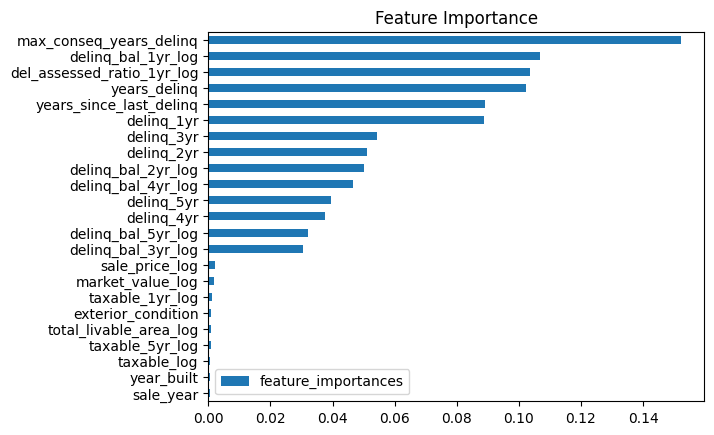

In [ ]:
# plot the feature importances
feat_imp_rf[feat_imp_rf.feature_importances >= 0.0005 ].sort_values(by='feature_importances').plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [ ]:
# # shap analysis
# explainer_rf = shap.TreeExplainer(rf)
# shap_values_rf = explainer_rf.shap_values(X_test)

# # Summary plot
# shap.summary_plot(shap_values_rf[1], X_test)

## XGBoost

In [ ]:
# set param grid for XGBoost Hyperparameter tuning
param_grid_xg = {
        'max_depth': [10, 15, 20, 25, 30],
        'learning_rate': [0.05, 0.1, 0.2],
        'colsample_bytree': [0.5, 0.75, 1.0] # columns used by tree
}

# run grid search cross validation
best_model_xg = GridSearchCV(xgb.XGBClassifier(random_state=42), 
                               param_grid=param_grid_xg, 
                               scoring='accuracy',
                               cv=3)

# fit model to data
best_model_xg = best_model_xg.fit(X_train, y_train)

# display params of best model for Decision tree
best_model_xg.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 20}

In [10]:
# create XGBoost model
xg = xgb.XGBClassifier(max_depth=20,
                       learning_rate=0.05,
                        colsample_bytree=0.5,
                        random_state=42)

# fit model on training set
xg = xg.fit(X_train, y_train)

# make predictions on the training set
y_train_predict_xg = xg.predict(X_train)

# calculate accuracy score
accuracy_score(y_train, y_train_predict_xg)

0.9860176349631501

In [ ]:
# make predictions on the validation set
y_val_predict_xg = xg.predict(X_val)

# calculate accuracy score of validation set
accuracy_score(y_val, y_val_predict_xg)

0.9835037935496523

In [14]:
print(classification_report(y_val, y_val_predict_xg))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    499271
           1       1.00      0.87      0.93     71830

    accuracy                           0.98    571101
   macro avg       0.99      0.93      0.96    571101
weighted avg       0.98      0.98      0.98    571101



In [15]:
# create arrays with importance and column names
importances_xg = xg.feature_importances_
feature_names = X_train.columns

# create feature importances df
feat_imp_xg = pd.DataFrame(importances_xg, index=feature_names, columns=['feature_importances'])

# dispaly importances
feat_imp_xg.sort_values(by='feature_importances', ascending=False)

,feature_importances
delinq_1yr,0.30539
years_since_last_delinq,0.21936
years_delinq,0.14829
max_conseq_years_delinq,0.09519
delinq_bal_1yr_log,0.07594
delinq_3yr,0.07411
delinq_bal_5yr_log,0.02314
delinq_5yr,0.01440
delinq_2yr,0.01317
del_assessed_ratio_1yr_log,0.01243


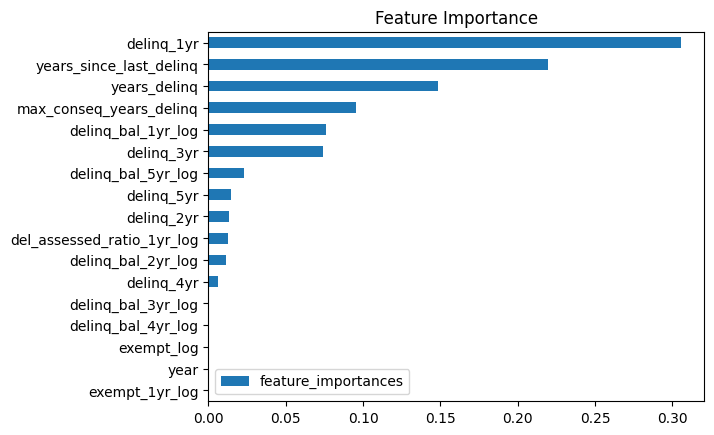

In [16]:
# plot the feature importances
feat_imp_xg[feat_imp_xg.feature_importances > 0.00001 ].sort_values(by='feature_importances').plot(kind='barh')
plt.title("Feature Importance")
plt.show()

## Final Model Selection

In [11]:
# make predictions on the test set
y_test_predict_xg = xg.predict(X_test)

# calculate accuracy score of test set
accuracy_score(y_test, y_test_predict_xg)

0.9833742192711972

In [12]:
# print classification report
print(classification_report(y_test, y_test_predict_xg))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    499396
           1       1.00      0.87      0.93     71705

    accuracy                           0.98    571101
   macro avg       0.99      0.93      0.96    571101
weighted avg       0.98      0.98      0.98    571101



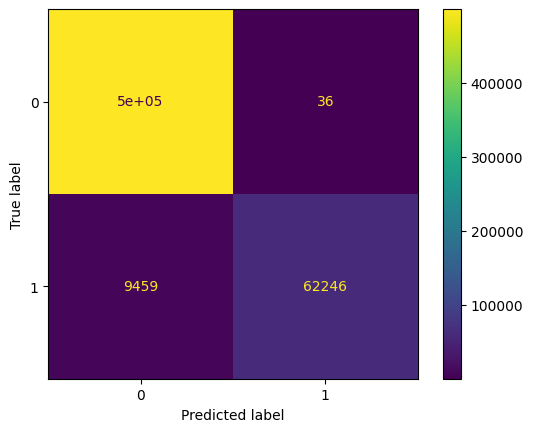

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_test_predict_xg, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=xg.classes_)

# display plot
disp.plot()
plt.show()